![Hackathon UP title](https://www.up.edu.pe/UP_Landing/hackathon-up/img/titulo2.png)

# **Taller**: Aprende a obtener datos de la web: scraping

## ¿Qué vamos a ver en este taller?

En este taller primero aprenderemos qué es Web Scraping y para qué nos puede servir. Luego, vamos a aprender a implementar un Web Scraper utilizando Python para extraer datos de la web.

<table>
<tr>
<th> <h3>Seccion</h3> </th>
<th> <h3>Partes</h3> </th>
<th> <h3>Duracion</h3> </th>
<th>  </th>
</tr>
<tr>
  <td> <h3>Teoría</h3> </td>
  <td> 
    <ol>
      <li>¿Qué es Web Scraping?</li>
      <li>¿Por qué y cuando aplicaríamos Web Scraping?</li>
      <li>Precauciones a tener en cuenta</li>
      <li>Recursos Adicionales</li>
    </ol>
  </td>
  <td> <h3>45 m</h3> </td>
  <td>
    <img src="https://media.giphy.com/media/d1ltmm0EvCAQo/giphy.gif" alt="Milhouse on Q" height=250px>
  </td>
</tr>
<tr>
  <td> <h3>Live Coding</h3> </td>
  <td> 
    <ol>
      <li>Identificación de datos</li>
      <li>Recopilando la información necesaria</li>
      <li>Disenando el Web Scraper</li>
      <li>Implementación del Web Scraper</li>
      <li>Pruebas de esquema de datos</li>
    </ol>
  </td>
  <td> <h3>1 h 30 m</h3> </td>
  <td>
    <img src="https://media.giphy.com/media/LmNwrBhejkK9EFP504/giphy.gif" alt="Cat Coder" height=250px>
  </td>
</tr>
</table>

# Teoría

## ¿Qué es Web Scraping?

Web Scraping es una técnica en la cuál un programa de computadora **extrae datos** desde un sitio web. Dichos programas son llamados **Bots** o **Web crawlers**. Escencialmente se busca copiar datos de una web en una **base de datos** o una **hoja de cálculo**, para posteriormente visualizarlos o analizarlos.

![Colatics Web Scraping Diagram](https://camo.githubusercontent.com/8ac742894c0c8c42c614220332741f7e9a6e80c6/68747470733a2f2f692e696d6775722e636f6d2f7a724d507452692e706e67)

## ¿Por qué y cuándo aplicaríamos Web Scraping?

- El principal motivo para utilizar Web Scraping es la necesidad de acceder a contenido **público** de la web, al cual no podemos acceder mediante una **API** (Application Programming Interface). 

![Table on Wikipedia Example](https://github.com/Claudio9701/WebScraping-HackathonUP-2020/blob/master/img/wikitable-ex.png?raw=1)

- Podemos aplicar Web Scraping cuando la página nos lo permita, para verificar el permiso podemos ver el archivo robots.txt de la página objetivo.

![Wikipedia robots.txt Example](https://github.com/Claudio9701/WebScraping-HackathonUP-2020/blob/master/img/robotstxt-ex.png?raw=1)

## Precauciones a tener en cuenta 🤗🤝

- Debemos hacernos una idea de la capacidad de la web en la que vamos a realizar Web Scraping para tratar de no **desbordar sus servidores**. 

- Tambien es necesario que verifiquemos si hay algun dato sensible que debamos reportar/tratar de manera especial. 

- Entre otros...

### ¿Tienen alguna pregunta?

![Questions Puppies](https://media.giphy.com/media/XHVmD4RyXgSjd8aUMb/giphy.gif)


### Recursos adicionales

- [Apify](https://apify.com/)
- [Datos Abiertos Gobierno Peruano](https://www.datosabiertos.gob.pe//)
- [Conjuntos de datos humanitarios](https://competent-hopper-e1121e.netlify.app/)


# Live Coding - Caso 1: Wikipedia <img src="https://img.icons8.com/color/96/000000/wikipedia-logo.png"/>

## 1. Identificación de datos

**Objetivo**: Quiero analizar la selección de Fútbol de Perú

¡Ajá, puedo obtener datos de las tablas de Wikipedia! Para este ejemplo veamos la sección "Últimos Convocados".

In [ ]:
# Importamos las librerias
import bs4 as bs
import requests
import pandas as pd
from google.colab import files

# Definamos la URL
URL = "https://es.wikipedia.org/wiki/Selecci%C3%B3n_de_f%C3%BAtbol_del_Per%C3%BA"

# Extraemos el codigo fuente (HTML)
source = requests.get(URL).text
soup = bs.BeautifulSoup(source,'lxml')

## 2. Recopilando la información necesaria

 - Revisemos el archivo robots.txt
 - **Inspeccionemos** la web

In [ ]:
# title of the page
print(soup.title, end='\n\n')

# get attributes:
print(soup.title.name, end='\n\n')

# get values:
print(soup.title.string, end='\n\n')

# beginning navigation:
print(soup.title.parent.name, end='\n\n')

# getting specific values:
print(soup.p, end='\n\n')

<title>Selección de fútbol del Perú - Wikipedia, la enciclopedia libre</title>

title

Selección de fútbol del Perú - Wikipedia, la enciclopedia libre

head

<p>La <b>selección de fútbol del <a href="/wiki/Per%C3%BA" title="Perú">Perú</a></b> es el equipo representativo de dicho país en las competiciones oficiales de <a href="/wiki/F%C3%BAtbol" title="Fútbol">fútbol</a> <a href="/wiki/Var%C3%B3n" title="Varón">masculino</a>. Su organización está a cargo de la <a href="/wiki/Federaci%C3%B3n_Peruana_de_F%C3%BAtbol" title="Federación Peruana de Fútbol">Federación Peruana de Fútbol</a> (FPF), la cual es una de las diez federaciones miembro de la <a href="/wiki/Confederaci%C3%B3n_Sudamericana_de_F%C3%BAtbol" title="Confederación Sudamericana de Fútbol">Confederación Sudamericana de Fútbol (Conmebol)</a>. Su debut se produjo el <a href="/wiki/1_de_noviembre" title="1 de noviembre">1 de noviembre</a> de <a href="/wiki/1927" title="1927">1927</a> ante la selección de <a href="/wiki/Selecci%C3%


## 3. Disenando el Web Scraper

1. Identifiquemos la tabla objetivo: "Ultimos Convocados"
2. Seleccionar la tabla objetivo - Tag name, XPath u otro
3. Extraer nombres de columnas - Sólo **1** vez
4. Extraer datos de cada fila - Iterar sobre las filas
5. Guardar archivo en formato CSV (Comma Separated Values)


## 4. Implementación del Web Scraper


In [ ]:
# XPath: /html/body/div[3]/div[3]/div[5]/div[1]/table[11]
# CSS Selector: #mw-content-text > div.mw-parser-output > table:nth-child(146)

In [ ]:
tables = soup.find_all('table')

In [ ]:
type(tables)

bs4.element.ResultSet

In [ ]:
len(tables)

26

In [ ]:
tables[12].text

'\n\n\n\nNombre\n\nPos.\n\nEdad\n\nPJ\n\nGoles\n\nEquipo\n\nFormativo\n\n\n1\n\nPedro Gallese\n\n\n\n30\xa0años\n\n62\n\n-64\n\n Orlando City S.C.\n\n U. San Martín\n\n\n12\n\nCarlos Cáceda\n\n\n\n28\xa0años\n\n6\n\n -3\n\n F.B.C. Melgar\n\n Universitario\n\n\n21\n\nPatricio Álvarez\n\n\n\n26\xa0años\n\n0\n\n0\n\n Libre\n\n Universitario\n\n\n2\n\nLuis Abram\n\n\n\n24\xa0años\n\n20\n\n1\n\n Vélez Sarfield\n\n Regatas\n\n\n3\n\nAldo Corzo\n\n\n\n31\xa0años\n\n31\n\n0\n\n Universitario\n\n Regatas\n\n\n4\n\nAnderson Santamaría\n\n\n\n28\xa0años\n\n17\n\n0\n\n Atlas F.C.\n\n Deportivo Municipal\n\n\n15\n\nCarlos Zambrano\n\n\n\n31\xa0años\n\n50\n\n4\n\n Boca Juniors\n\n Schalke 04\n\n\n6\n\nMiguel Trauco\n\n\n\n27 años\n\n50\n\n0\n\n A.S. Saint-Étienne\n\n Virgen de Chapi\n\n\n15\n\nMarcos López\n\n\n\n20\xa0años\n\n2\n\n0\n\n San Jose Earthquakes\n\n U. San Martín\n\n\n17\n\nLuis Advíncula\n\n\n\n29 años\n\n89\n\n1\n\n Rayo Vallecano\n\n Esther Grande\n\n\n22\n\nAlexander Callens\n\n\n\n

In [ ]:
table_rows = tables[12].find_all('tr')

In [ ]:
len(table_rows)

25

In [ ]:
column_names = [th.text.strip('\n') for th in table_rows[0].find_all('th')]
column_names

['', 'Nombre', 'Pos.', 'Edad', 'PJ', 'Goles', 'Equipo', 'Formativo']

In [ ]:
column_names[0] = 'Num.'

In [ ]:
column_names

['Num.', 'Nombre', 'Pos.', 'Edad', 'PJ', 'Goles', 'Equipo', 'Formativo']

In [ ]:
# Extraer datos de la tabla
data = []

# Iterar sobre cada fila
for tr in table_rows[1:-1]:
  row_data = []

  # Valor especial numero de camiseta
  num = tr.find('th').text.strip('\n')
  row_data.append(num)

  # Extraer los demas valores de la fila
  for td in tr.find_all('td'):
    value = td.text.strip('\n')

    # Valor especial de posicion de la cancha (img (href) dentro de un enlace (a))
    if value == '':
      value = td.find('a')['href']

    row_data.append(value)

  # Almacenar los datos de la fila
  print(row_data, end='\n\n')
  data.append(row_data)

['1', 'Pedro Gallese', '/wiki/Archivo:FootballPositionGK_es.png', '30\xa0años', '62', '-64', ' Orlando City S.C.', ' U. San Martín']

['12', 'Carlos Cáceda', '/wiki/Archivo:FootballPositionGK_es.png', '28\xa0años', '6', ' -3', ' F.B.C. Melgar', ' Universitario']

['21', 'Patricio Álvarez', '/wiki/Archivo:FootballPositionGK_es.png', '26\xa0años', '0', '0', ' Libre', ' Universitario']

['2', 'Luis Abram', '/wiki/Archivo:FootballPositionCT_es.png', '24\xa0años', '20', '1', ' Vélez Sarfield', ' Regatas']

['3', 'Aldo Corzo', '/wiki/Archivo:FootballPositionCT_es.png', '31\xa0años', '31', '0', ' Universitario', ' Regatas']

['4', 'Anderson Santamaría', '/wiki/Archivo:FootballPositionCT_es.png', '28\xa0años', '17', '0', ' Atlas F.C.', ' Deportivo Municipal']

['15', 'Carlos Zambrano', '/wiki/Archivo:FootballPositionCT_es.png', '31\xa0años', '50', '4', ' Boca Juniors', ' Schalke 04']

['6', 'Miguel Trauco', '/wiki/Archivo:FootballPositionCT_es.png', '27 años', '50', '0', ' A.S. Saint-Étienne',

In [ ]:
data

[['1',
  'Pedro Gallese',
  '/wiki/Archivo:FootballPositionGK_es.png',
  '30\xa0años',
  '62',
  '-64',
  ' Orlando City S.C.',
  ' U. San Martín'],
 ['12',
  'Carlos Cáceda',
  '/wiki/Archivo:FootballPositionGK_es.png',
  '28\xa0años',
  '6',
  ' -3',
  ' F.B.C. Melgar',
  ' Universitario'],
 ['21',
  'Patricio Álvarez',
  '/wiki/Archivo:FootballPositionGK_es.png',
  '26\xa0años',
  '0',
  '0',
  ' Libre',
  ' Universitario'],
 ['2',
  'Luis Abram',
  '/wiki/Archivo:FootballPositionCT_es.png',
  '24\xa0años',
  '20',
  '1',
  ' Vélez Sarfield',
  ' Regatas'],
 ['3',
  'Aldo Corzo',
  '/wiki/Archivo:FootballPositionCT_es.png',
  '31\xa0años',
  '31',
  '0',
  ' Universitario',
  ' Regatas'],
 ['4',
  'Anderson Santamaría',
  '/wiki/Archivo:FootballPositionCT_es.png',
  '28\xa0años',
  '17',
  '0',
  ' Atlas F.C.',
  ' Deportivo Municipal'],
 ['15',
  'Carlos Zambrano',
  '/wiki/Archivo:FootballPositionCT_es.png',
  '31\xa0años',
  '50',
  '4',
  ' Boca Juniors',
  ' Schalke 04'],
 ['6'

In [ ]:
# Creamos un DataFrame / Tabla de datos
convocados_peru_df = pd.DataFrame(data, columns=column_names)

In [ ]:
# Veamos la tabla de datos extraídos
convocados_peru_df

,Num.,Nombre,Pos.,Edad,PJ,Goles,Equipo,Formativo
0,1,Pedro Gallese,/wiki/Archivo:FootballPositionGK_es.png,30 años,62,-64,Orlando City S.C.,U. San Martín
1,12,Carlos Cáceda,/wiki/Archivo:FootballPositionGK_es.png,28 años,6,-3,F.B.C. Melgar,Universitario
2,21,Patricio Álvarez,/wiki/Archivo:FootballPositionGK_es.png,26 años,0,0,Libre,Universitario
3,2,Luis Abram,/wiki/Archivo:FootballPositionCT_es.png,24 años,20,1,Vélez Sarfield,Regatas
4,3,Aldo Corzo,/wiki/Archivo:FootballPositionCT_es.png,31 años,31,0,Universitario,Regatas
5,4,Anderson Santamaría,/wiki/Archivo:FootballPositionCT_es.png,28 años,17,0,Atlas F.C.,Deportivo Municipal
6,15,Carlos Zambrano,/wiki/Archivo:FootballPositionCT_es.png,31 años,50,4,Boca Juniors,Schalke 04
7,6,Miguel Trauco,/wiki/Archivo:FootballPositionCT_es.png,27 años,50,0,A.S. Saint-Étienne,Virgen de Chapi
8,15,Marcos López,/wiki/Archivo:FootballPositionCT_es.png,20 años,2,0,San Jose Earthquakes,U. San Martín
9,17,Luis Advíncula,/wiki/Archivo:FootballPositionCT_es.png,29 años,89,1,Rayo Vallecano,Esther Grande


In [ ]:
valores_posicion = {
  '/wiki/Archivo:FootballPositionGK_es.png': 'Arquero',
  '/wiki/Archivo:FootballPositionCT_es.png': 'Defensa',
  '/wiki/Archivo:FootballPositionMID_es.png': 'Volante',
  '/wiki/Archivo:FootballPositionFWD_es.png': 'Delantero'
}

In [ ]:
convocados_peru_df['Pos.'] = convocados_peru_df['Pos.'].replace(valores_posicion)

In [ ]:
convocados_peru_df

,Num.,Nombre,Pos.,Edad,PJ,Goles,Equipo,Formativo
0,1,Pedro Gallese,Arquero,30 años,62,-64,Orlando City S.C.,U. San Martín
1,12,Carlos Cáceda,Arquero,28 años,6,-3,F.B.C. Melgar,Universitario
2,21,Patricio Álvarez,Arquero,26 años,0,0,Libre,Universitario
3,2,Luis Abram,Defensa,24 años,20,1,Vélez Sarfield,Regatas
4,3,Aldo Corzo,Defensa,31 años,31,0,Universitario,Regatas
5,4,Anderson Santamaría,Defensa,28 años,17,0,Atlas F.C.,Deportivo Municipal
6,15,Carlos Zambrano,Defensa,31 años,50,4,Boca Juniors,Schalke 04
7,6,Miguel Trauco,Defensa,27 años,50,0,A.S. Saint-Étienne,Virgen de Chapi
8,15,Marcos López,Defensa,20 años,2,0,San Jose Earthquakes,U. San Martín
9,17,Luis Advíncula,Defensa,29 años,89,1,Rayo Vallecano,Esther Grande


In [ ]:
convocados_peru_df.dtypes()

In [ ]:
# Convierte a valores de tipo entero (int)
convocados_peru_df['Num.'] = convocados_peru_df['Num.'].astype(int)
convocados_peru_df['PJ'] = convocados_peru_df['PJ'].astype(int)
convocados_peru_df['Goles'] = convocados_peru_df['Goles'].astype(int)

In [ ]:
# Eliminando el texto 'años' y convirtiendo el valor atipo de dato entero (int)
convocados_peru_df['Edad'] = convocados_peru_df['Edad'].str.strip(' años').astype(int)

In [ ]:
# Grabamos el archivo CSV dentro de Colab
convocados_peru_df.to_csv('convocados_peru.csv', index=False)

In [ ]:
# Descargamos el archivo en nuestra PC
files.download('convocados_peru.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import matplotlib.pyplot as plt

%matplotlib inline

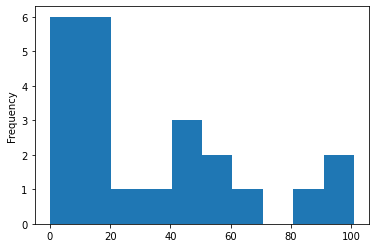

In [ ]:
convocados_peru_df['PJ'].plot(kind='hist')

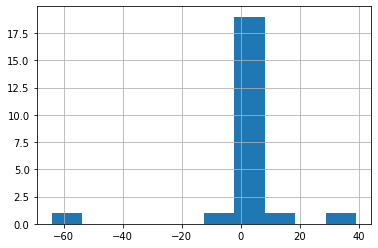

In [ ]:
convocados_peru_df['Goles'].hist()

## 5. Pruebas de esquema de datos

# Live Coding - Caso 2: ¡Elijamos nosotros!

![Areas Hackathon UP](https://github.com/Claudio9701/WebScraping-HackathonUP-2020/blob/master/img/areas-hackathon.png?raw=1)

## 1. Identificación de datos

**Objetivo**: Obtener precios de productos en Supermercados (Wong)

¡Ajá, puedo obtener datos desde su pagina web! Para este ejemplo veamos la sección "Abarrotes".

## 2. Recopilando la información necesaria

 - Revisemos el archivo robots.txt
 - **Inspeccionemos** la web

## 3. Disenando el Web Scraper

1. Identifiquemos la items objetivo: "Productos dentro de la cuadricula de productos"
2. Seleccionar el conjunto de los items objetivo (ul) - Tag name, XPath u otro
3. Definir nombres de columnas
4. Extraer datos de cada item (li) - Iterar sobre los items (li)
5. Guardar archivo en formato CSV (Comma Separated Values)

In [ ]:
# Definamos la URL
WONG_URL = "https://www.wong.pe/abarrotes"

# Extraemos el codigo fuente (HTML)
source = requests.get(WONG_URL).text
soup = bs.BeautifulSoup(source,'lxml')

In [ ]:
# XPath: /html/body/div[25]/div/div[2]/div[5]/div[2]/div[2]/div[2]/div/ul/li[1]/div[1]
# Relative XPATH: //*[@id="ResultItems_28705788"]/div/ul/li[1]/div[1]

In [ ]:
product_lists = soup.find_all('ul')

In [ ]:
len(product_lists)

56

In [ ]:
product_items = product_lists[18].find_all('li')

In [ ]:
len(product_items)

73

In [ ]:
selected_div_attrs = ['data-name', 'data-price', 'data-brand', 'data-category']
data = []
for product_item in product_items:
  try:
    product_main_div = product_item.find('div')
    product_data = [product_main_div[attr] for attr in selected_div_attrs]
    print(product_data, end='\n\n')
    data.append(product_data)
  except:
    pass

['Galletas Vainilla Field Pack 6 Unid x 37 g', 'S/. 3.20', 'Field', 'https://www.wong.pe/abarrotes/galletas-snacks-y-golosinas/galletas']

['Arroz Extra Costeño Bolsa 5 Kg', 'S/. 20.29', 'Costeño', 'https://www.wong.pe/abarrotes/arroz/arroz-extra-y-superior']

['Aceite Vegetal Primor Premium Botella 1 L', 'S/. 7.49', 'Primor', 'https://www.wong.pe/abarrotes/aceites/aceites-vegetales']

['Papas Artesanales Andinas Saladas Inka Chips Bolsa 142 g', 'S/. 6.20', 'Inka Chips', 'https://www.wong.pe/abarrotes/galletas-snacks-y-golosinas/piqueos']

['Sal de Mesa Marina Emsal Bolsa 1 kg', 'S/. 2.15', 'Emsal', 'https://www.wong.pe/abarrotes/condimentos-vinagres-y-comida-instantanea/sal-sal-parrillera-y-sal-especial']

['Galletas Oreo Nabisco Original Pack 6 Unid x 36 g', 'S/. 3.29', 'Nabisco', 'https://www.wong.pe/abarrotes/galletas-snacks-y-golosinas/galletas']

['Galletas San Jorge Soda Pack 7 Unidades', 'S/. 2.89', 'San Jorge', 'https://www.wong.pe/abarrotes/galletas-snacks-y-golosinas/galleta

In [ ]:
# Creamos un DataFrame / Tabla de datos
productos_wong_df = pd.DataFrame(data, columns=selected_div_attrs)

In [ ]:
productos_wong_df

,data-name,data-price,data-brand,data-category
0,Galletas Vainilla Field Pack 6 Unid x 37 g,S/. 3.20,Field,https://www.wong.pe/abarrotes/galletas-snacks-...
1,Arroz Extra Costeño Bolsa 5 Kg,S/. 20.29,Costeño,https://www.wong.pe/abarrotes/arroz/arroz-extr...
2,Aceite Vegetal Primor Premium Botella 1 L,S/. 7.49,Primor,https://www.wong.pe/abarrotes/aceites/aceites-...
3,Papas Artesanales Andinas Saladas Inka Chips B...,S/. 6.20,Inka Chips,https://www.wong.pe/abarrotes/galletas-snacks-...
4,Sal de Mesa Marina Emsal Bolsa 1 kg,S/. 2.15,Emsal,https://www.wong.pe/abarrotes/condimentos-vina...
5,Galletas Oreo Nabisco Original Pack 6 Unid x 36 g,S/. 3.29,Nabisco,https://www.wong.pe/abarrotes/galletas-snacks-...
6,Galletas San Jorge Soda Pack 7 Unidades,S/. 2.89,San Jorge,https://www.wong.pe/abarrotes/galletas-snacks-...
7,Galletas Morochas Nestlé Pack 6 Unidades,S/. 4.30,Nestlé,https://www.wong.pe/abarrotes/galletas-snacks-...
8,Galletas Soda Field Pack 6 Unid x 34 g,S/. 2.30,Field,https://www.wong.pe/abarrotes/galletas-snacks-...
9,Spaguetti Don Vittorio Paquete 1 Kg,S/. 4.59,Don Vittorio,https://www.wong.pe/abarrotes/fideos-pastas-y-...


In [ ]:
# Grabamos el archivo CSV dentro de Colab
productos_wong_df.to_csv('productos_wong.csv', index=False)

In [ ]:
# Descargamos el archivo en nuestra PC
files.download('productos_wong.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Recursos Adicionales de Beautiful Soup 4

- [Web scraping and parsing with Beautiful Soup 4](https://pythonprogramming.net/introduction-scraping-parsing-beautiful-soup-tutorial/)
- [Beautiful Soup Documentation¶](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)